#CIFAR-10 Dataset PyTorch implementation

## Load srouce code files from git

In [1]:
import os, sys, importlib

user = "Paurnima-Chavan"
repo = "cifar-s8"
src_dir = "src"

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

Cloning into 'cifar-s8'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 7.50 KiB | 2.50 MiB/s, done.


In [2]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from utils import train, test,plot_dataset_images, plot_train_test_accuracy_loss,reset_variables
from dataset import load_cifar10_data
from model_1 import Net_1, model_summary
from model_2 import Net_2
from model_3 import Net_3

## Load CIFAR10 Dataset

In [5]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

from torchvision import datasets, transforms
%matplotlib inline

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
#------------- added below code
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? False


device(type='cpu')

In [6]:
dataset  = CIFAR10(root='data/', download=True)
test_dataset = CIFAR10(root='data/', train=False)

100%|██████████| 170498071/170498071 [00:02<00:00, 75591338.00it/s]


Extracting data/cifar-10-python.tar.gz to data/


In [7]:
data = dataset.data / 255 # data is numpy array

mean = data.mean(axis = (0,1,2))
std = data.std(axis = (0,1,2))
print(f"Mean : {mean}   STD: {std}")

Mean : [0.49139968 0.48215841 0.44653091]   STD: [0.24703223 0.24348513 0.26158784]


In [8]:
classes = dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
class_count = {}
for _, index in dataset:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

In [4]:
batch_size = 64
train_loader , test_loader = load_cifar10_data(batch_size=batch_size) #128

100%|██████████| 170498071/170498071 [00:02<00:00, 78922659.27it/s]


Extracting data/cifar-10-python.tar.gz to data/


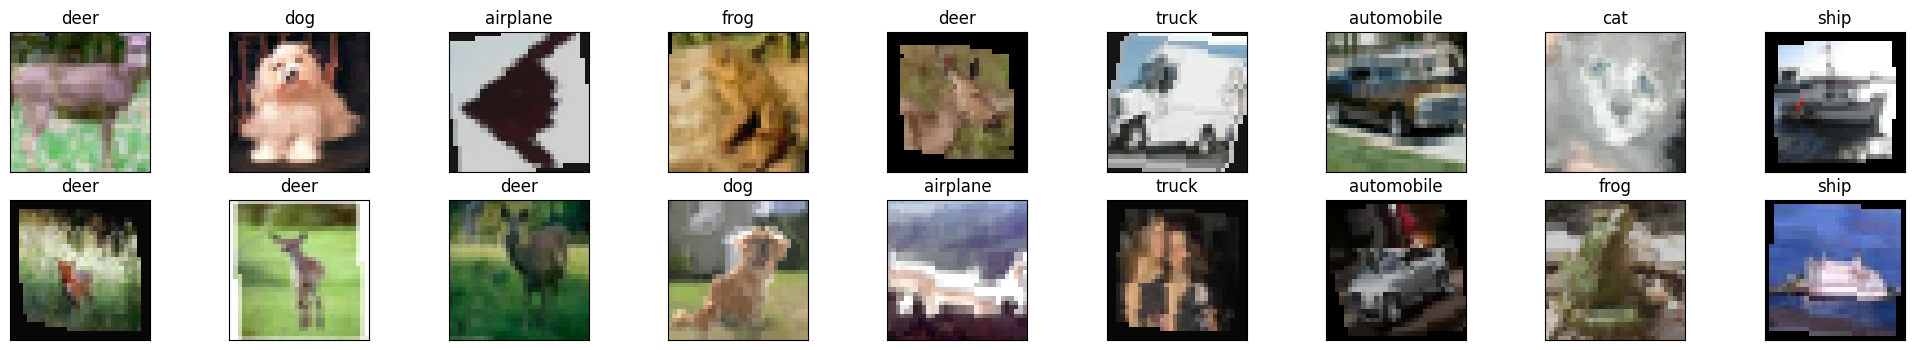

In [12]:
plot_dataset_images(train_loader, 18)

## Load the model

### Model Using Batch Normalization

In [15]:
model = Net_1().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
       BatchNorm2d-2            [-1, 8, 32, 32]              16
            Conv2d-3            [-1, 8, 32, 32]             576
       BatchNorm2d-4            [-1, 8, 32, 32]              16
            Conv2d-5            [-1, 8, 32, 32]             576
       BatchNorm2d-6            [-1, 8, 32, 32]              16
        BasicBlock-7            [-1, 8, 32, 32]               0
            Conv2d-8            [-1, 8, 32, 32]             576
       BatchNorm2d-9            [-1, 8, 32, 32]              16
           Conv2d-10            [-1, 8, 32, 32]             576
      BatchNorm2d-11            [-1, 8, 32, 32]              16
       BasicBlock-12            [-1, 8, 32, 32]               0
           Conv2d-13           [-1, 16, 16, 16]           1,152
      BatchNorm2d-14           [-1, 16,

### Model Using Group Normalization

In [6]:
model = Net_2().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
         GroupNorm-2            [-1, 8, 32, 32]              16
            Conv2d-3            [-1, 8, 32, 32]             576
         GroupNorm-4            [-1, 8, 32, 32]              16
            Conv2d-5            [-1, 8, 32, 32]             576
         GroupNorm-6            [-1, 8, 32, 32]              16
        BasicBlock-7            [-1, 8, 32, 32]               0
            Conv2d-8            [-1, 8, 32, 32]             576
         GroupNorm-9            [-1, 8, 32, 32]              16
           Conv2d-10            [-1, 8, 32, 32]             576
        GroupNorm-11            [-1, 8, 32, 32]              16
       BasicBlock-12            [-1, 8, 32, 32]               0
           Conv2d-13           [-1, 16, 16, 16]           1,152
        GroupNorm-14           [-1, 16,

### Model Using Layer Normalization

In [14]:
model = Net_3().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
         GroupNorm-2            [-1, 8, 32, 32]              16
            Conv2d-3            [-1, 8, 32, 32]             576
         GroupNorm-4            [-1, 8, 32, 32]              16
            Conv2d-5            [-1, 8, 32, 32]             576
         GroupNorm-6            [-1, 8, 32, 32]              16
        BasicBlock-7            [-1, 8, 32, 32]               0
            Conv2d-8            [-1, 8, 32, 32]             576
         GroupNorm-9            [-1, 8, 32, 32]              16
           Conv2d-10            [-1, 8, 32, 32]             576
        GroupNorm-11            [-1, 8, 32, 32]              16
       BasicBlock-12            [-1, 8, 32, 32]               0
           Conv2d-13           [-1, 16, 16, 16]           1,152
        GroupNorm-14           [-1, 16,

## Train the Model

### Model Batch Normalization

In [16]:
from tqdm import tqdm

model = Net_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,  weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
num_epochs = 20
criterion = nn.CrossEntropyLoss() #F.nll_loss
reset_variables()

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.5820 Batch_id=781 Accuracy=38.12: 100%|██████████| 782/782 [00:49<00:00, 15.65it/s]


Test set: Average loss: 0.0326, Accuracy: 3438/10000 (34.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.1032 Batch_id=781 Accuracy=53.04: 100%|██████████| 782/782 [00:53<00:00, 14.59it/s]


Test set: Average loss: 0.0217, Accuracy: 5022/10000 (50.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.1822 Batch_id=781 Accuracy=58.66: 100%|██████████| 782/782 [00:58<00:00, 13.30it/s]


Test set: Average loss: 0.0205, Accuracy: 5422/10000 (54.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.1865 Batch_id=781 Accuracy=62.14: 100%|██████████| 782/782 [00:50<00:00, 15.58it/s]


Test set: Average loss: 0.0236, Accuracy: 5132/10000 (51.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.4535 Batch_id=781 Accuracy=64.13: 100%|██████████| 782/782 [00:54<00:00, 14.26it/s]


Test set: Average loss: 0.0228, Accuracy: 5489/10000 (54.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.4951 Batch_id=781 Accuracy=66.17: 100%|██████████| 782/782 [00:52<00:00, 15.02it/s]


Test set: Average loss: 0.0183, Accuracy: 6100/10000 (61.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.7515 Batch_id=781 Accuracy=67.89: 100%|██████████| 782/782 [00:50<00:00, 15.53it/s]


Test set: Average loss: 0.0175, Accuracy: 6100/10000 (61.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.3726 Batch_id=781 Accuracy=69.14: 100%|██████████| 782/782 [00:50<00:00, 15.48it/s]


Test set: Average loss: 0.0181, Accuracy: 6067/10000 (60.67%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.6641 Batch_id=781 Accuracy=72.31: 100%|██████████| 782/782 [00:59<00:00, 13.17it/s]


Test set: Average loss: 0.0143, Accuracy: 6810/10000 (68.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.5117 Batch_id=781 Accuracy=73.48: 100%|██████████| 782/782 [00:49<00:00, 15.71it/s]


Test set: Average loss: 0.0147, Accuracy: 6771/10000 (67.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.8442 Batch_id=781 Accuracy=73.50: 100%|██████████| 782/782 [00:52<00:00, 14.86it/s]


Test set: Average loss: 0.0137, Accuracy: 7001/10000 (70.01%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.8873 Batch_id=781 Accuracy=73.78: 100%|██████████| 782/782 [00:53<00:00, 14.50it/s]


Test set: Average loss: 0.0138, Accuracy: 6959/10000 (69.59%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=1.1975 Batch_id=781 Accuracy=73.92: 100%|██████████| 782/782 [00:53<00:00, 14.65it/s]


Test set: Average loss: 0.0138, Accuracy: 6958/10000 (69.58%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.9402 Batch_id=781 Accuracy=74.17: 100%|██████████| 782/782 [00:49<00:00, 15.82it/s]


Test set: Average loss: 0.0136, Accuracy: 7037/10000 (70.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.6556 Batch_id=781 Accuracy=74.53: 100%|██████████| 782/782 [00:48<00:00, 16.07it/s]


Test set: Average loss: 0.0135, Accuracy: 7052/10000 (70.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.7520 Batch_id=781 Accuracy=74.26: 100%|██████████| 782/782 [00:48<00:00, 16.19it/s]


Test set: Average loss: 0.0139, Accuracy: 6996/10000 (69.96%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.6550 Batch_id=781 Accuracy=75.05: 100%|██████████| 782/782 [00:48<00:00, 16.19it/s]


Test set: Average loss: 0.0135, Accuracy: 7058/10000 (70.58%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.3938 Batch_id=781 Accuracy=75.00: 100%|██████████| 782/782 [00:51<00:00, 15.31it/s]


Test set: Average loss: 0.0135, Accuracy: 7047/10000 (70.47%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.9182 Batch_id=781 Accuracy=75.15: 100%|██████████| 782/782 [00:49<00:00, 15.74it/s]


Test set: Average loss: 0.0132, Accuracy: 7102/10000 (71.02%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.6281 Batch_id=781 Accuracy=75.06: 100%|██████████| 782/782 [00:49<00:00, 15.80it/s]


Test set: Average loss: 0.0132, Accuracy: 7107/10000 (71.07%)

Adjusting learning rate of group 0 to 1.0000e-04.


### Model Using Group Normalization

In [17]:
from tqdm import tqdm

model = Net_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,  weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
num_epochs = 20
criterion = nn.CrossEntropyLoss() #F.nll_loss
reset_variables()

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.7671 Batch_id=781 Accuracy=28.80: 100%|██████████| 782/782 [00:50<00:00, 15.60it/s]


Test set: Average loss: 0.0274, Accuracy: 3682/10000 (36.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.4305 Batch_id=781 Accuracy=42.27: 100%|██████████| 782/782 [00:50<00:00, 15.46it/s]


Test set: Average loss: 0.0234, Accuracy: 4589/10000 (45.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.3690 Batch_id=781 Accuracy=47.75: 100%|██████████| 782/782 [00:49<00:00, 15.94it/s]


Test set: Average loss: 0.0215, Accuracy: 5001/10000 (50.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.5355 Batch_id=781 Accuracy=51.47: 100%|██████████| 782/782 [00:50<00:00, 15.62it/s]


Test set: Average loss: 0.0197, Accuracy: 5401/10000 (54.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.6350 Batch_id=781 Accuracy=54.37: 100%|██████████| 782/782 [00:50<00:00, 15.47it/s]


Test set: Average loss: 0.0193, Accuracy: 5574/10000 (55.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.9587 Batch_id=781 Accuracy=56.92: 100%|██████████| 782/782 [00:49<00:00, 15.93it/s]


Test set: Average loss: 0.0184, Accuracy: 5823/10000 (58.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.2884 Batch_id=781 Accuracy=58.96: 100%|██████████| 782/782 [00:49<00:00, 15.73it/s]


Test set: Average loss: 0.0165, Accuracy: 6230/10000 (62.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.1260 Batch_id=781 Accuracy=60.00: 100%|██████████| 782/782 [00:50<00:00, 15.43it/s]


Test set: Average loss: 0.0173, Accuracy: 6136/10000 (61.36%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.9252 Batch_id=781 Accuracy=65.61: 100%|██████████| 782/782 [00:49<00:00, 15.91it/s]


Test set: Average loss: 0.0150, Accuracy: 6669/10000 (66.69%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.7284 Batch_id=781 Accuracy=66.01: 100%|██████████| 782/782 [00:48<00:00, 15.98it/s]


Test set: Average loss: 0.0150, Accuracy: 6666/10000 (66.66%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.2324 Batch_id=781 Accuracy=66.79: 100%|██████████| 782/782 [00:50<00:00, 15.34it/s]


Test set: Average loss: 0.0152, Accuracy: 6640/10000 (66.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.6075 Batch_id=781 Accuracy=67.03: 100%|██████████| 782/782 [00:50<00:00, 15.61it/s]


Test set: Average loss: 0.0147, Accuracy: 6747/10000 (67.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.8634 Batch_id=781 Accuracy=67.33: 100%|██████████| 782/782 [00:49<00:00, 15.94it/s]


Test set: Average loss: 0.0148, Accuracy: 6723/10000 (67.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.5252 Batch_id=781 Accuracy=67.94: 100%|██████████| 782/782 [00:50<00:00, 15.49it/s]


Test set: Average loss: 0.0148, Accuracy: 6753/10000 (67.53%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.7255 Batch_id=781 Accuracy=68.07: 100%|██████████| 782/782 [00:50<00:00, 15.46it/s]


Test set: Average loss: 0.0139, Accuracy: 6878/10000 (68.78%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.6548 Batch_id=781 Accuracy=68.24: 100%|██████████| 782/782 [00:48<00:00, 15.98it/s]


Test set: Average loss: 0.0145, Accuracy: 6828/10000 (68.28%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.7907 Batch_id=781 Accuracy=69.48: 100%|██████████| 782/782 [00:49<00:00, 15.69it/s]


Test set: Average loss: 0.0139, Accuracy: 6924/10000 (69.24%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.7577 Batch_id=781 Accuracy=69.37: 100%|██████████| 782/782 [00:50<00:00, 15.55it/s]


Test set: Average loss: 0.0139, Accuracy: 6947/10000 (69.47%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=1.2135 Batch_id=781 Accuracy=69.40: 100%|██████████| 782/782 [00:48<00:00, 16.09it/s]


Test set: Average loss: 0.0139, Accuracy: 6943/10000 (69.43%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=1.0948 Batch_id=781 Accuracy=69.64: 100%|██████████| 782/782 [00:50<00:00, 15.60it/s]


Test set: Average loss: 0.0138, Accuracy: 6935/10000 (69.35%)

Adjusting learning rate of group 0 to 1.0000e-04.


### Model Using Layer Normalization

In [15]:
from tqdm import tqdm

model = Net_3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,  weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
num_epochs = 20
criterion = nn.CrossEntropyLoss() #F.nll_loss
reset_variables()

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.3930 Batch_id=781 Accuracy=27.56: 100%|██████████| 782/782 [00:51<00:00, 15.10it/s]


Test set: Average loss: 0.0280, Accuracy: 3322/10000 (33.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.2253 Batch_id=781 Accuracy=37.19: 100%|██████████| 782/782 [00:48<00:00, 16.13it/s]


Test set: Average loss: 0.0275, Accuracy: 3695/10000 (36.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.4487 Batch_id=781 Accuracy=41.82: 100%|██████████| 782/782 [00:49<00:00, 15.91it/s]


Test set: Average loss: 0.0255, Accuracy: 4203/10000 (42.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.2664 Batch_id=781 Accuracy=45.24: 100%|██████████| 782/782 [00:50<00:00, 15.40it/s]


Test set: Average loss: 0.0228, Accuracy: 4698/10000 (46.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.9546 Batch_id=781 Accuracy=48.31: 100%|██████████| 782/782 [00:50<00:00, 15.51it/s]


Test set: Average loss: 0.0217, Accuracy: 4955/10000 (49.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.7382 Batch_id=781 Accuracy=50.20: 100%|██████████| 782/782 [00:50<00:00, 15.39it/s]


Test set: Average loss: 0.0216, Accuracy: 4995/10000 (49.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.2494 Batch_id=781 Accuracy=52.14: 100%|██████████| 782/782 [00:51<00:00, 15.06it/s]


Test set: Average loss: 0.0215, Accuracy: 4996/10000 (49.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.5467 Batch_id=781 Accuracy=54.63: 100%|██████████| 782/782 [00:51<00:00, 15.07it/s]


Test set: Average loss: 0.0202, Accuracy: 5451/10000 (54.51%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=1.0851 Batch_id=781 Accuracy=59.32: 100%|██████████| 782/782 [00:49<00:00, 15.75it/s]


Test set: Average loss: 0.0180, Accuracy: 5932/10000 (59.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=1.2709 Batch_id=781 Accuracy=60.39: 100%|██████████| 782/782 [00:49<00:00, 15.66it/s]


Test set: Average loss: 0.0181, Accuracy: 5912/10000 (59.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=1.2409 Batch_id=781 Accuracy=61.05: 100%|██████████| 782/782 [00:51<00:00, 15.32it/s]


Test set: Average loss: 0.0171, Accuracy: 6105/10000 (61.05%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=1.2253 Batch_id=781 Accuracy=61.22: 100%|██████████| 782/782 [00:51<00:00, 15.30it/s]


Test set: Average loss: 0.0179, Accuracy: 5988/10000 (59.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.8158 Batch_id=781 Accuracy=61.49: 100%|██████████| 782/782 [00:49<00:00, 15.84it/s]


Test set: Average loss: 0.0173, Accuracy: 6038/10000 (60.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.8789 Batch_id=781 Accuracy=61.73: 100%|██████████| 782/782 [00:49<00:00, 15.74it/s]


Test set: Average loss: 0.0172, Accuracy: 6109/10000 (61.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.7140 Batch_id=781 Accuracy=62.42: 100%|██████████| 782/782 [00:51<00:00, 15.28it/s]


Test set: Average loss: 0.0168, Accuracy: 6169/10000 (61.69%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.9679 Batch_id=781 Accuracy=62.39: 100%|██████████| 782/782 [00:49<00:00, 15.80it/s]


Test set: Average loss: 0.0177, Accuracy: 6024/10000 (60.24%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.8852 Batch_id=781 Accuracy=63.46: 100%|██████████| 782/782 [00:49<00:00, 15.94it/s]


Test set: Average loss: 0.0167, Accuracy: 6261/10000 (62.61%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=1.2595 Batch_id=781 Accuracy=63.84: 100%|██████████| 782/782 [00:56<00:00, 13.95it/s]


Test set: Average loss: 0.0167, Accuracy: 6253/10000 (62.53%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=1.3382 Batch_id=781 Accuracy=63.68: 100%|██████████| 782/782 [00:50<00:00, 15.41it/s]


Test set: Average loss: 0.0165, Accuracy: 6272/10000 (62.72%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.9732 Batch_id=781 Accuracy=63.88: 100%|██████████| 782/782 [00:50<00:00, 15.54it/s]


Test set: Average loss: 0.0165, Accuracy: 6272/10000 (62.72%)

Adjusting learning rate of group 0 to 1.0000e-04.


## Plot Misclassified images

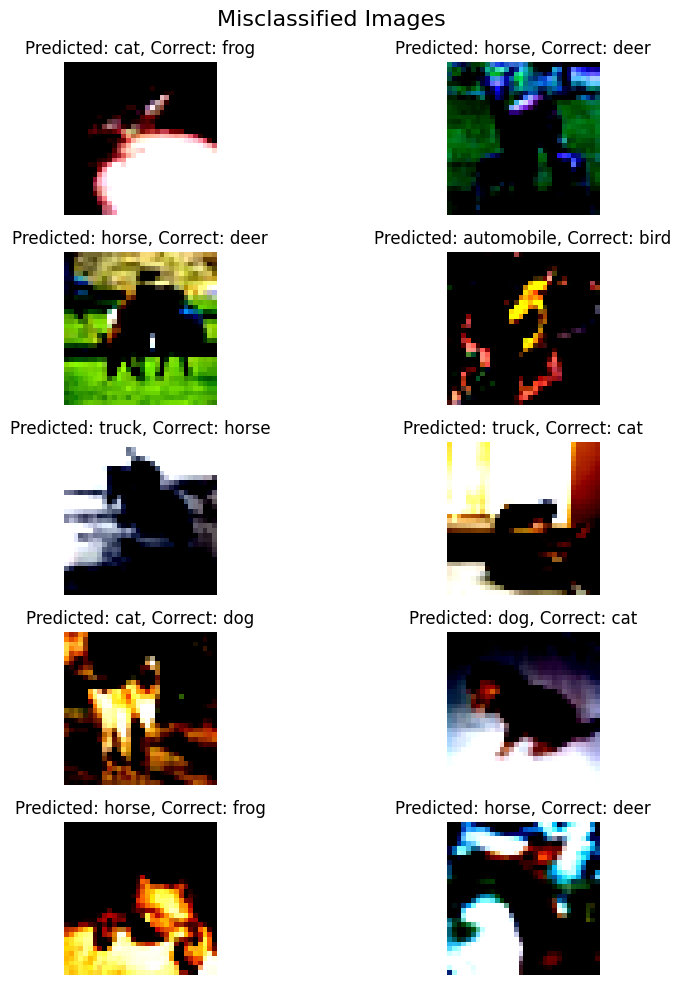

In [28]:
import torch
import torchvision
import matplotlib.pyplot as plt


# Function to get misclassified images
def get_misclassified_images(model, test_loader, device):
    misclassified_images = []
    misclassified_labels = []
    correct_labels = []

    model.eval()

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)

            misclassified_idx = (pred != target).nonzero(as_tuple=True)[0]
            misclassified_images.extend(data[misclassified_idx])
            misclassified_labels.extend(pred[misclassified_idx])
            correct_labels.extend(target[misclassified_idx])

            # Map label indices to class names
            misclassified_labels = [classes[label] for label in misclassified_labels]
            correct_labels = [classes[label] for label in correct_labels]

            if len(misclassified_images) >= 10:
                break

    return misclassified_images, misclassified_labels, correct_labels


# Function to plot misclassified images
def plot_misclassified_images(images, pred_labels, correct_labels):
    fig, axes = plt.subplots(5, 2, figsize=(10, 10))
    fig.suptitle("Misclassified Images", fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].cpu().permute(1, 2, 0))
        ax.axis("off")
        ax.set_title(f"Predicted: {pred_labels[i]}, Correct: {correct_labels[i]}")

    plt.tight_layout()
    plt.show()



# Get the misclassified images
misclassified_images, pred_labels, correct_labels = get_misclassified_images(model, test_loader, device)

# Plot the misclassified images
plot_misclassified_images(misclassified_images, pred_labels, correct_labels)
